In [1]:
#importing useful libraies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

### ASSESSING DATA

In [2]:
#loading in data
data = pd.read_csv(r"C:\Users\HP 1030\Desktop\FSDS\Week 8 - Machine Learning\Real Estate\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#checking for missing features
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#checking for data duplicates
data.duplicated().sum()

0

In [6]:
#statistical description of dataset
#categorical feat.
data.describe(exclude=np.number)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
#mszoning
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [8]:
#statistical describtion of numerical feats
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### observations
- from our data summary, we can identify Alley, ID,PoolQC.
- Being a large multidimensional dataset, we wil be dropping any feature with 30% less data observation 

### DATA CLEANING
- from our observations above, we will be cleaning that data by dropping off
- redudanted features like the ID cloumn, and any feature that has more than 70% of its data missing

In [9]:
#identifying features have 70% more
data.isnull().mean() <= (1-0.3)

Id               True
MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 81, dtype: bool

In [10]:
#dropping off 30% less data
data2 = data.loc[:, data.isnull().mean() <= (1-0.3)]

In [11]:
data2 = data2.drop('Id',axis=1)

In [12]:
for c in data.columns:
    if c not in data2.columns:
        print(f" dropped columns: {c}")

 dropped columns: Id
 dropped columns: Alley
 dropped columns: PoolQC
 dropped columns: Fence
 dropped columns: MiscFeature


### EXPLORATORY DATA ANALYSIS
- use visualization techniques to explore data
- carry out Univariate, Bivariate and Multivariate visualization analysis

### UNIVARIATE ANALYSIS

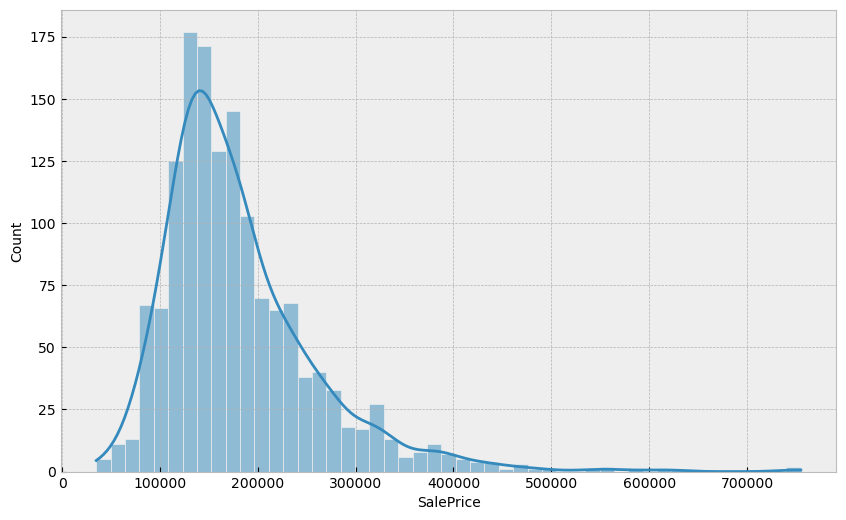

In [13]:
#UNIVARIATE distribtuion of the dependanet feature(price of house)
plt.style.use('bmh')
plt.figure(figsize=(10,6))
sb.histplot(data2['SalePrice'],kde=True);

#### observations
- from the distribution of the sales price variable, is positively skewed
- we can also easily detect some outlier prices,(prices above 500000)

In [14]:
#creating cat_features & num_feats for easy analysis
num_feat = data2.select_dtypes(include=['float64','int64'])
cat_feat = data2.select_dtypes(include=['object'])
num_feat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


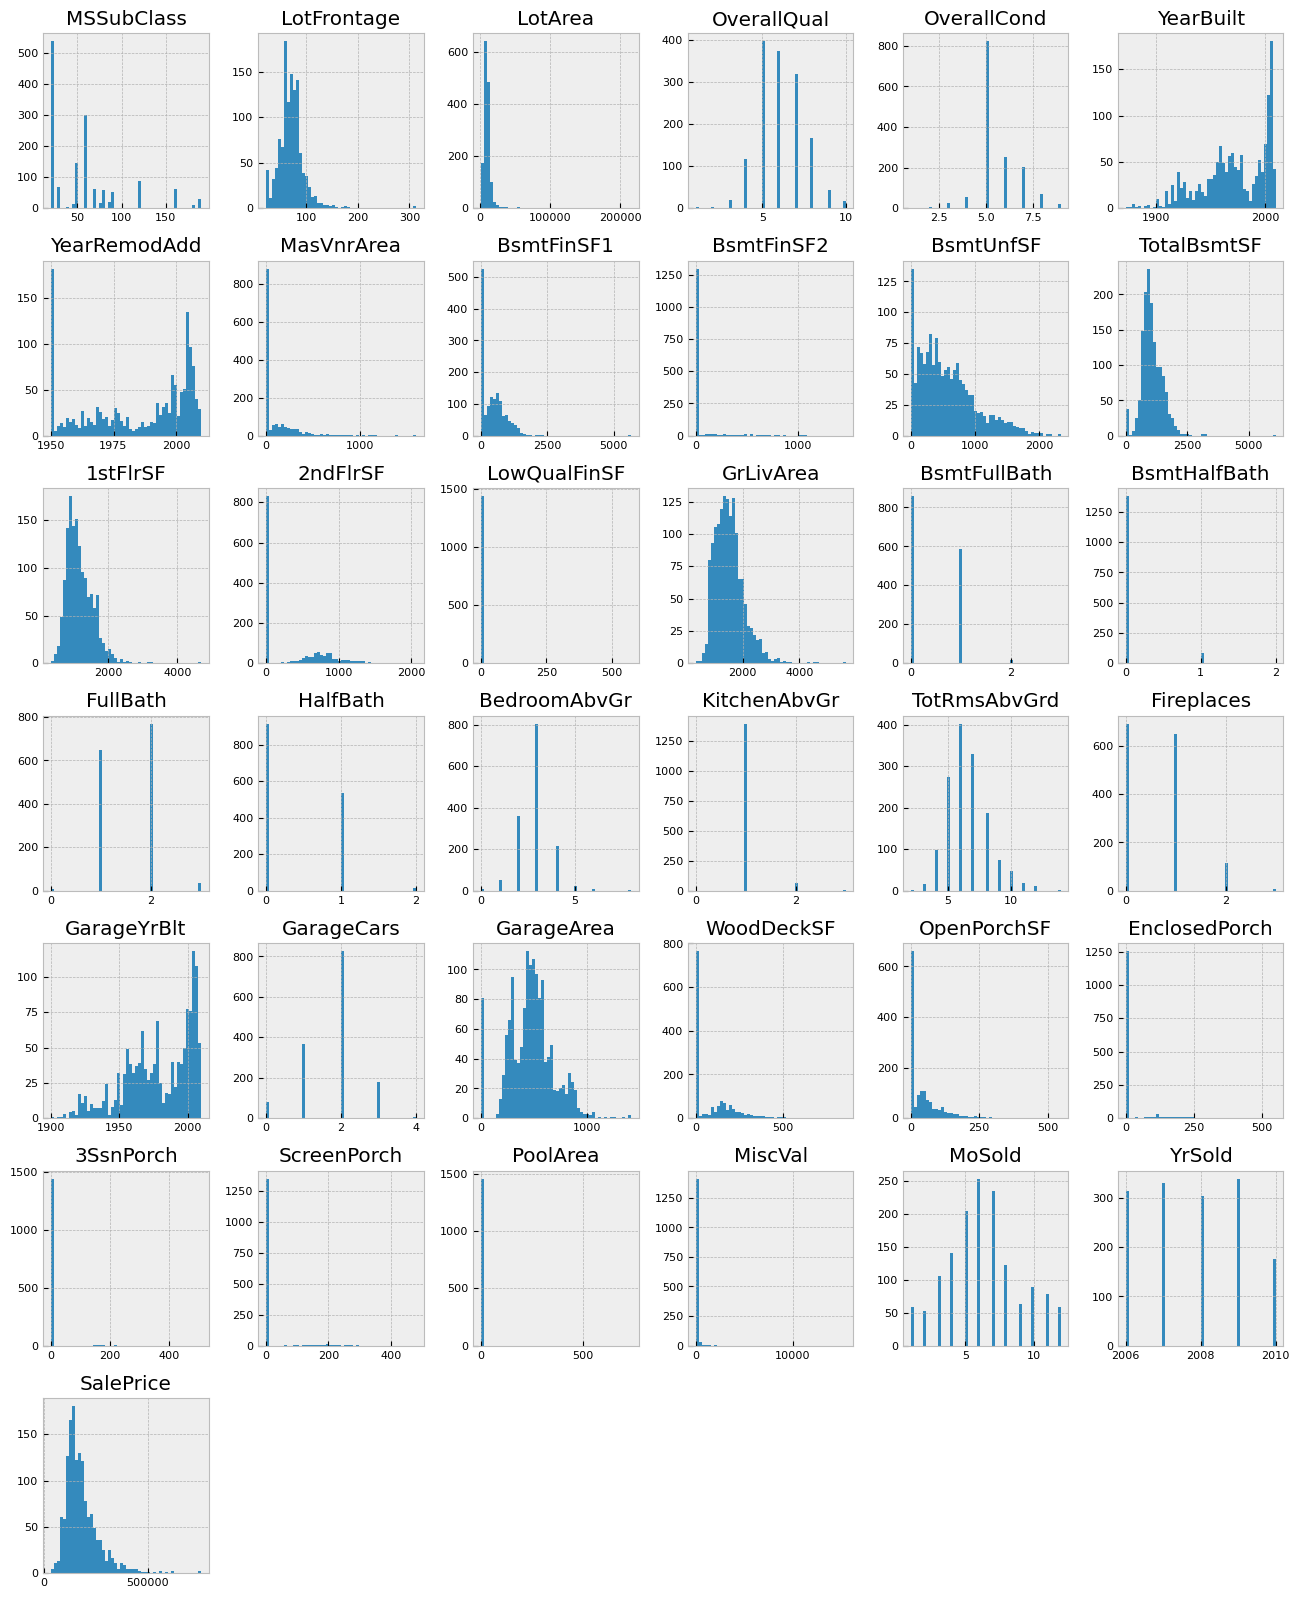

In [15]:
#univariate distributions for all numerical features
num_feat.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

<Axes: xlabel='Neighborhood', ylabel='count'>

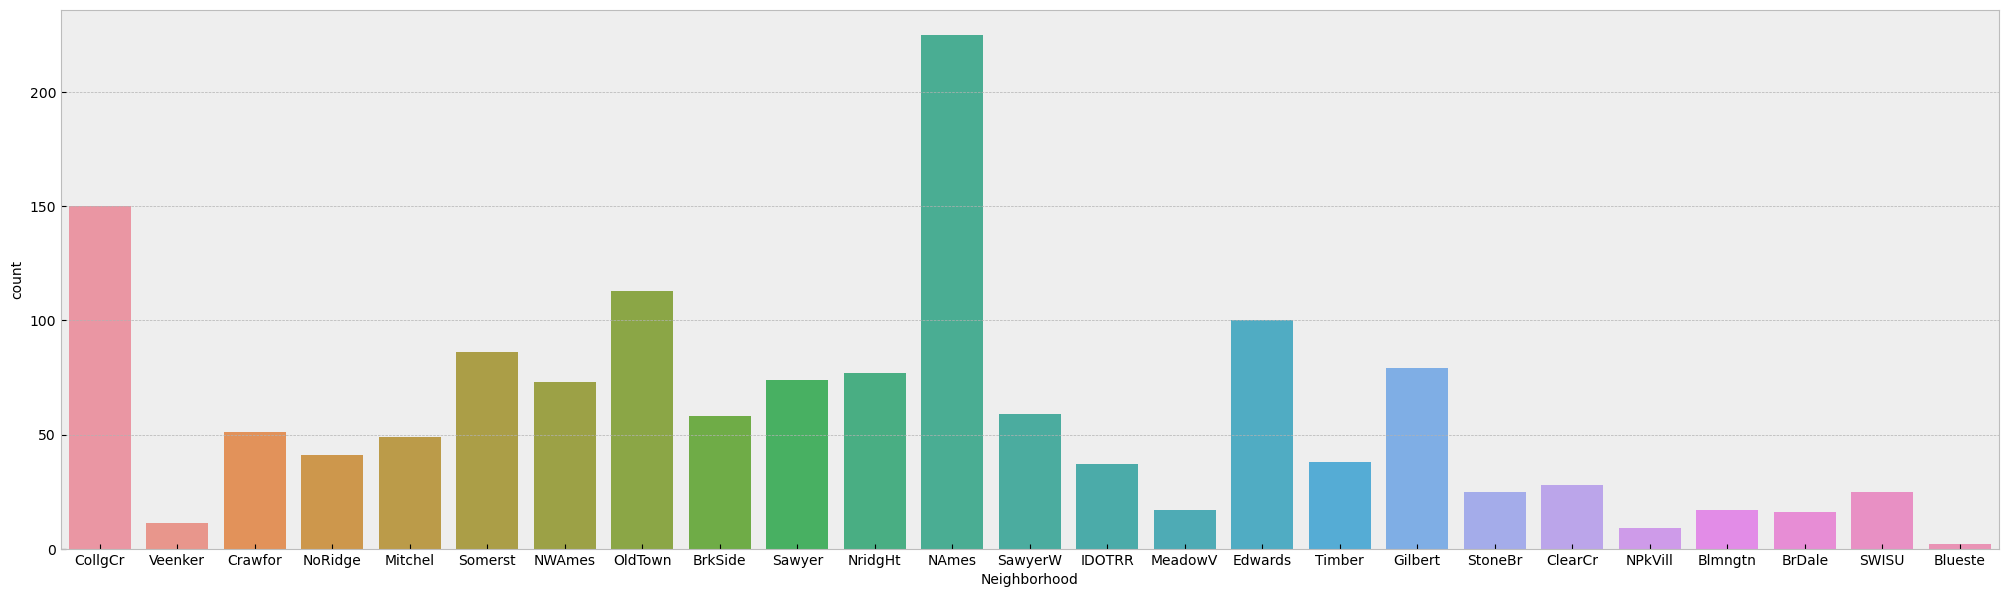

In [16]:
#univariate distribution of the neigborhood feature
plt.figure(figsize=(25,7))
sb.countplot(x='Neighborhood',data=cat_feat)

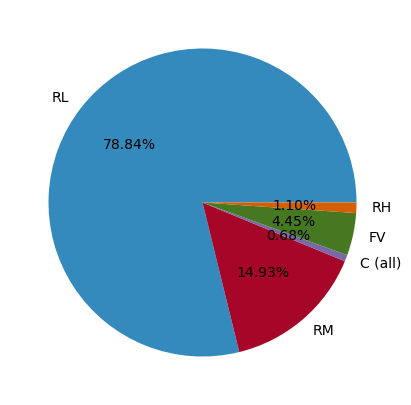

In [17]:
#univariate analysis of the mzoning feature
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(cat_feat["MSZoning"])
ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f'{p:.2f}%')
plt.show()

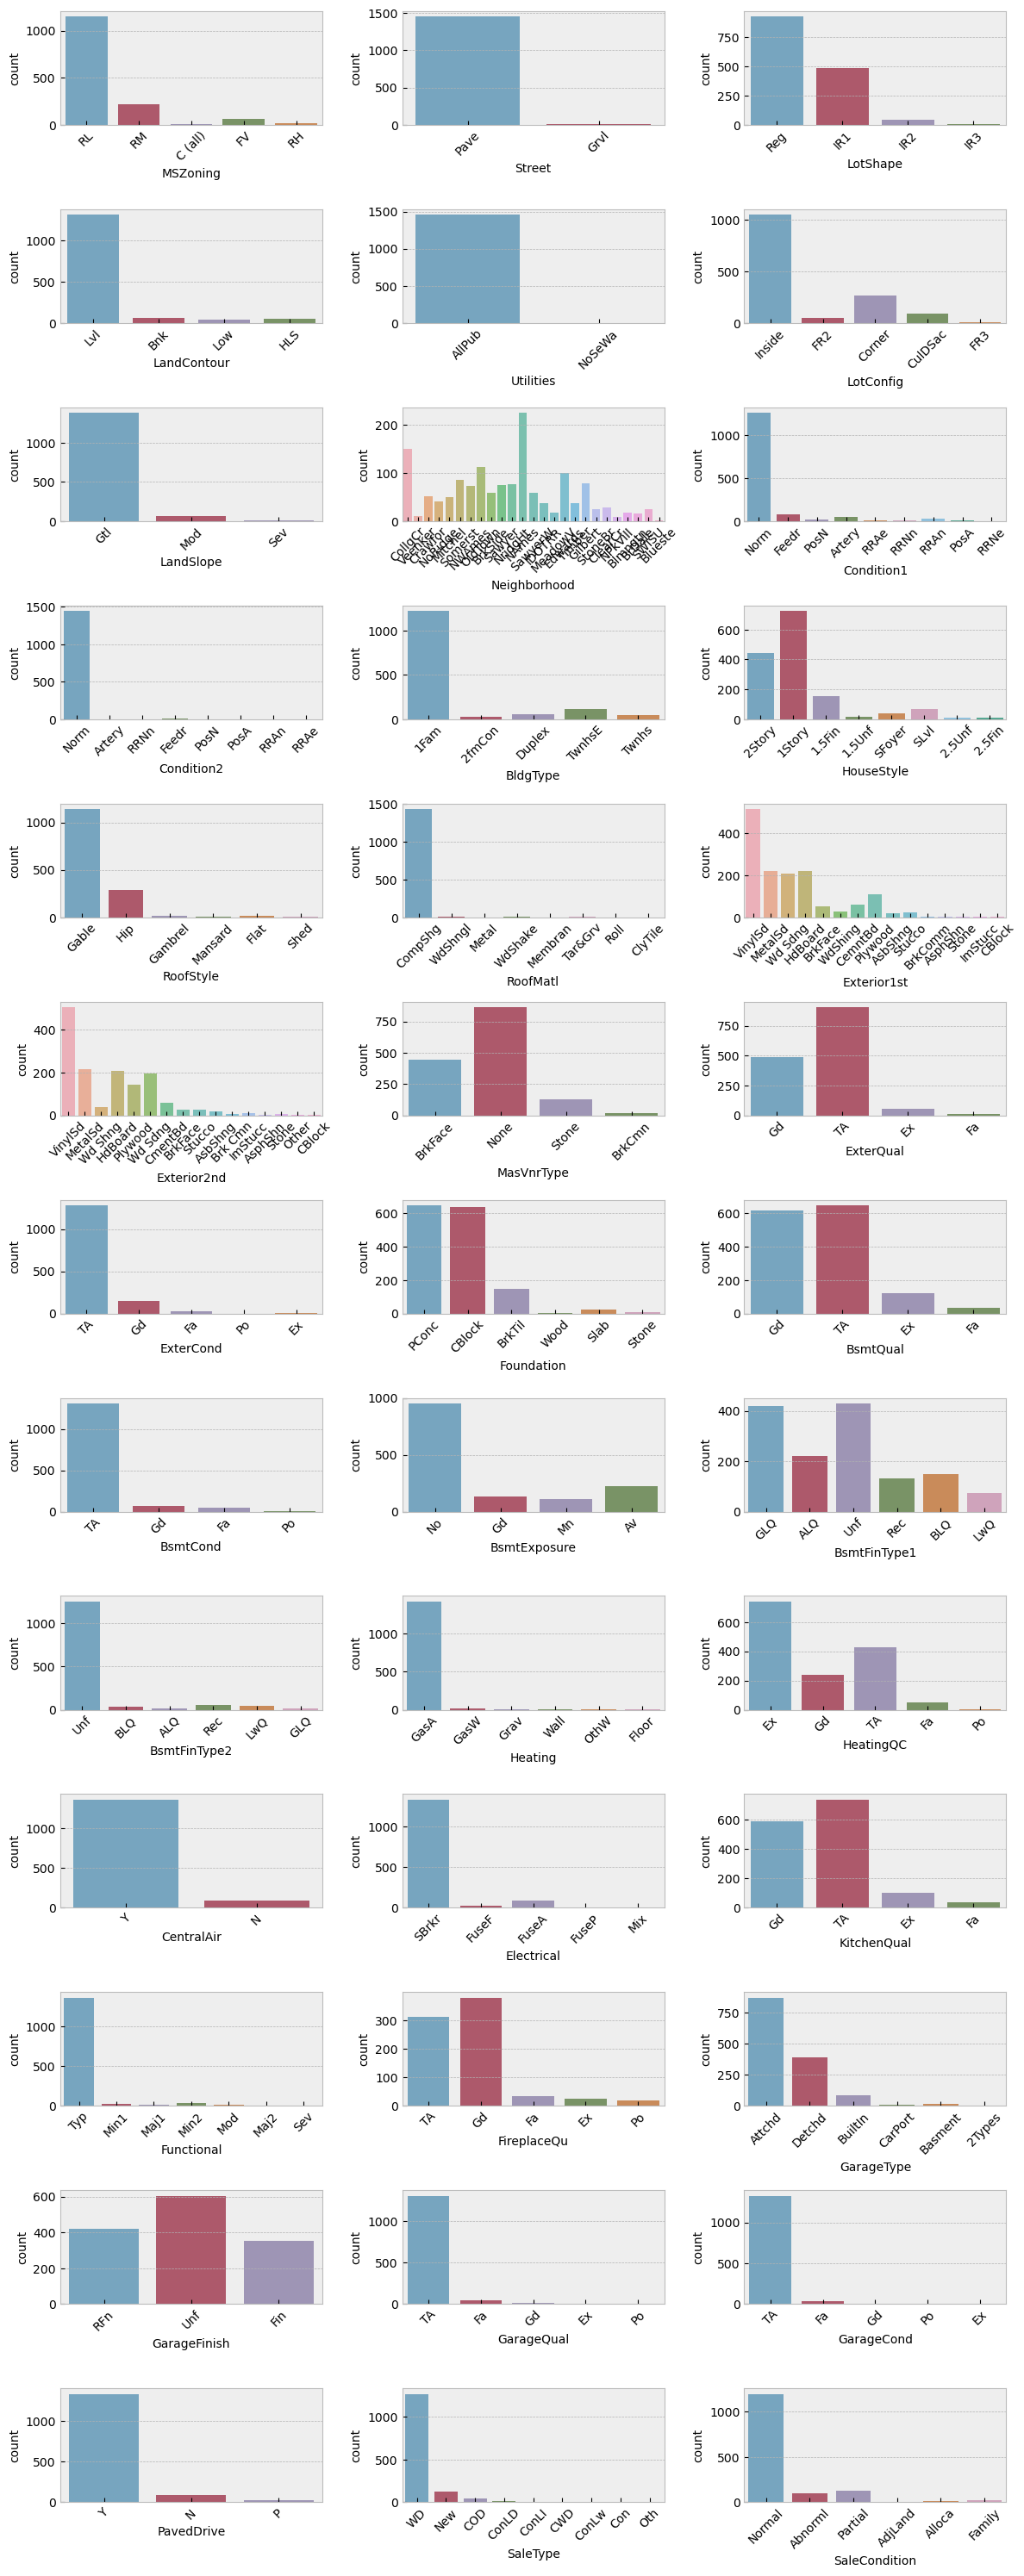

In [18]:
#unnivariate plots of the other categorical features
fig, axes = plt.subplots(round(len(cat_feat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(cat_feat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sb.countplot(x=cat_feat.columns[i], alpha=0.7, data=cat_feat, ax=ax)

fig.tight_layout();

#### observations

### BIVARIATE ANALYSIS

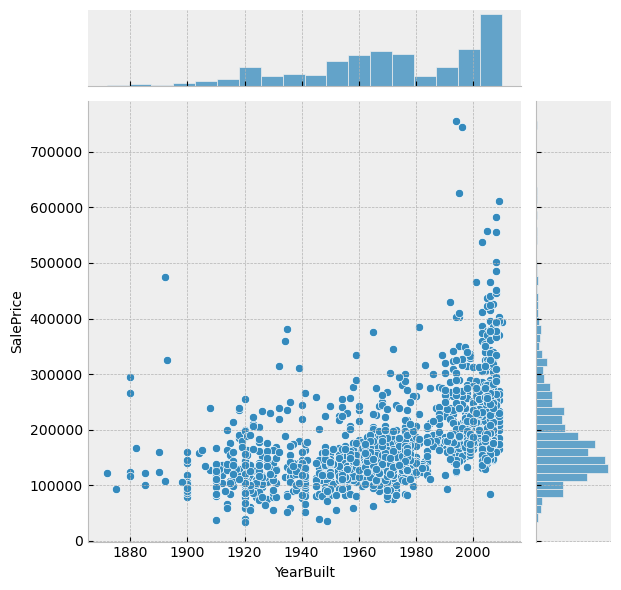

In [19]:
#relationships/correlations/interactions between two features
sb.jointplot(x='YearBuilt',y='SalePrice',data=num_feat)

#### observation
#### debatable
- there appears to be a positive relationship btwn the year a house was built and the sales price, this is often a good indication
  that the year built feature is an important feature in determing the price of a house 

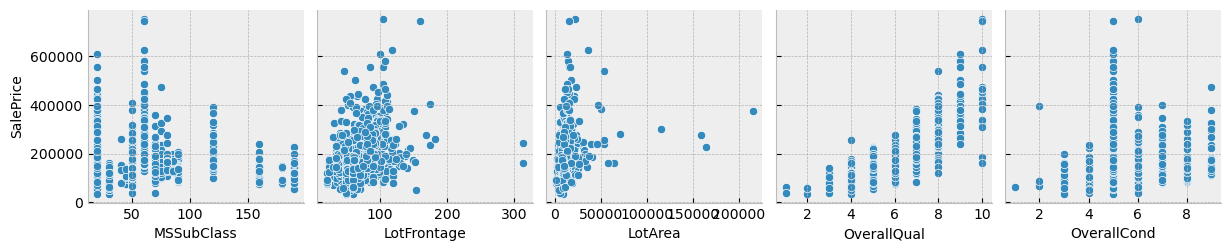

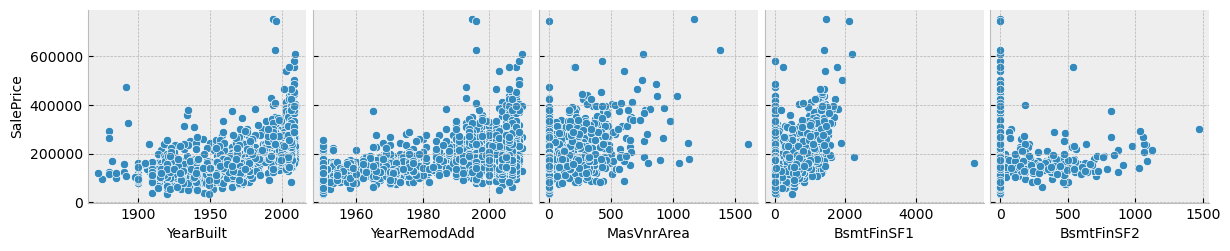

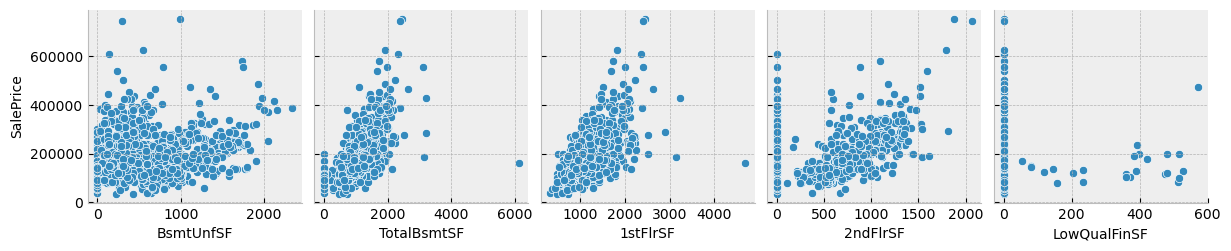

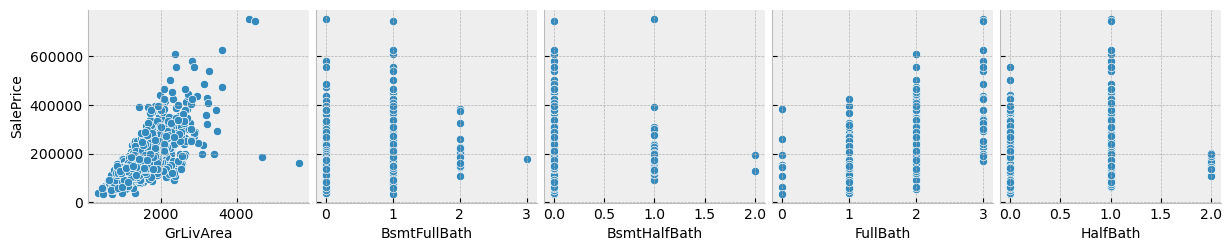

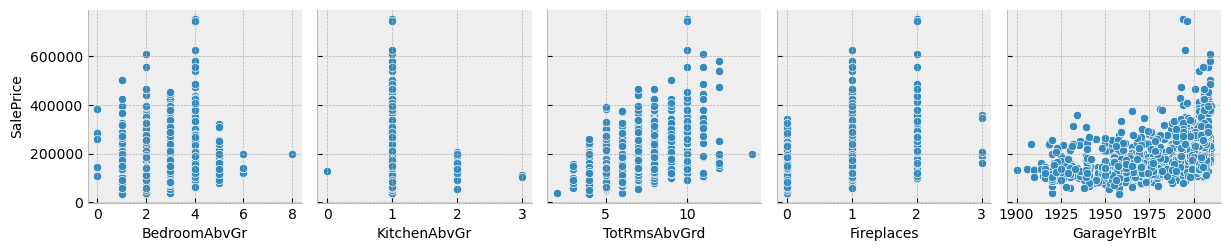

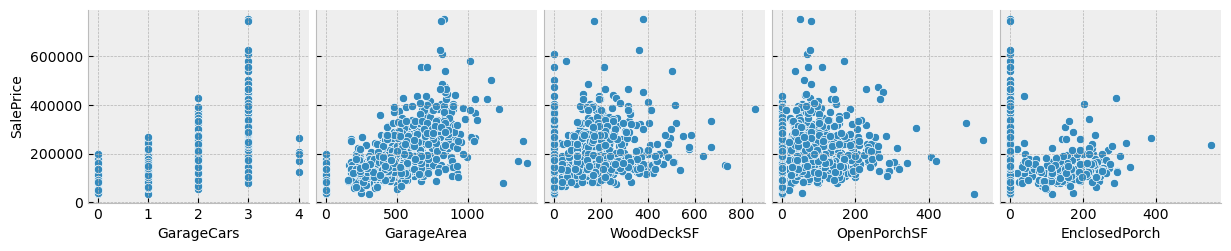

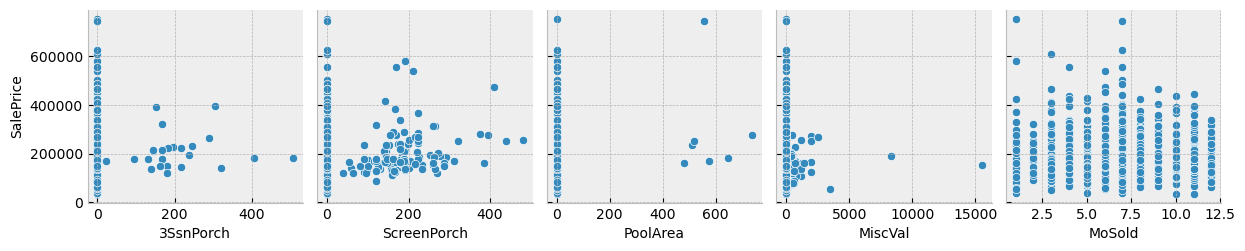

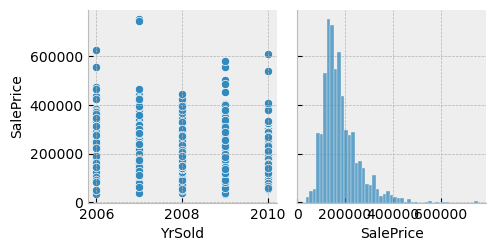

In [20]:
#bivariate plots for the other numerical features, plotting out hte relationship between the features
#and the sale price feature
for i in range(0, len(num_feat.columns), 5):
    sb.pairplot(data=num_feat,
                x_vars=num_feat.columns[i:i+5],
                y_vars=['SalePrice'])

#### observation

### Correlation 
lets try to explore features that are strongly correlated with the sales price feature

In [21]:
corr_feat = num_feat.corr()['SalePrice']
imp_feat = corr_feat[corr_feat > 0.5]
imp_feat

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [22]:
#ncorr_feat = num_feat.corr()['SalePrice']
#nimp_feat = corr_feat[corr_feat < 0.5]
#nimp_feat

### 0bservation


<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

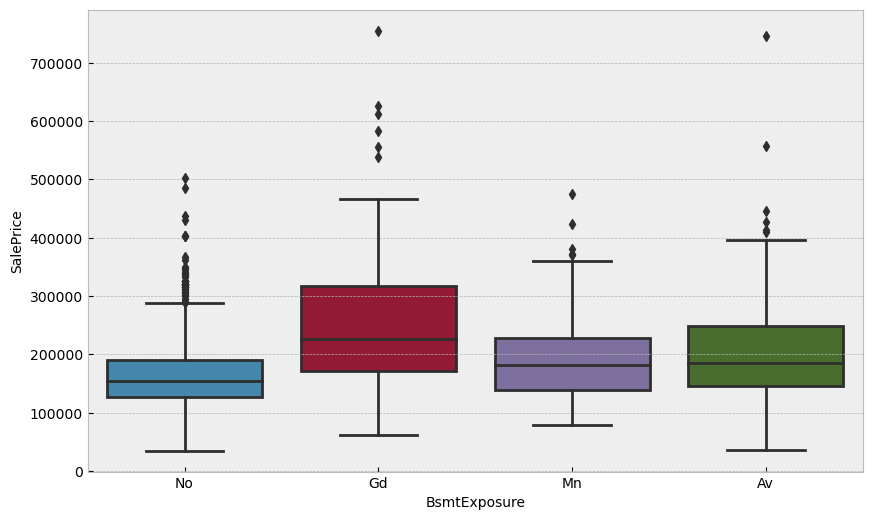

In [23]:
plt.figure(figsize=(10,6))
sb.boxplot(x='BsmtExposure',y='SalePrice',data = data2)

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

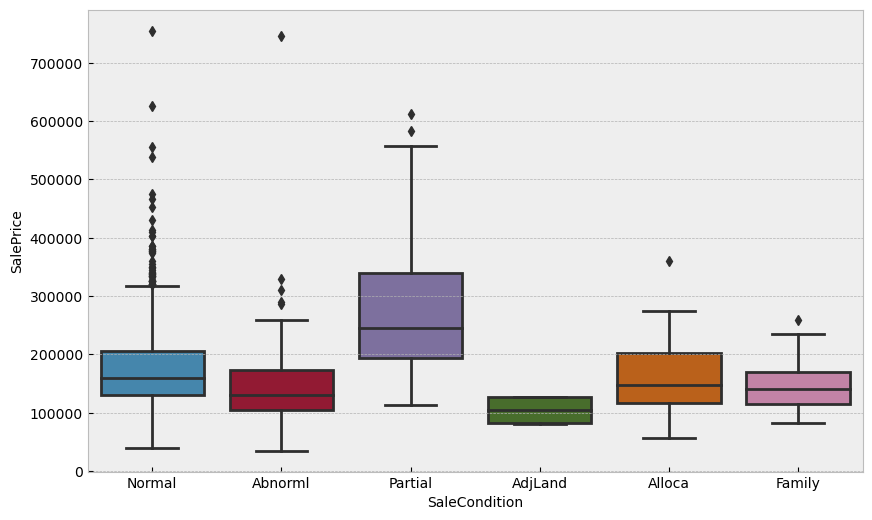

In [24]:
plt.figure(figsize=(10,6))
sb.boxplot(x='SaleCondition',y='SalePrice',data = data2)

### observations

### MULTIVARIATE ANALYIS

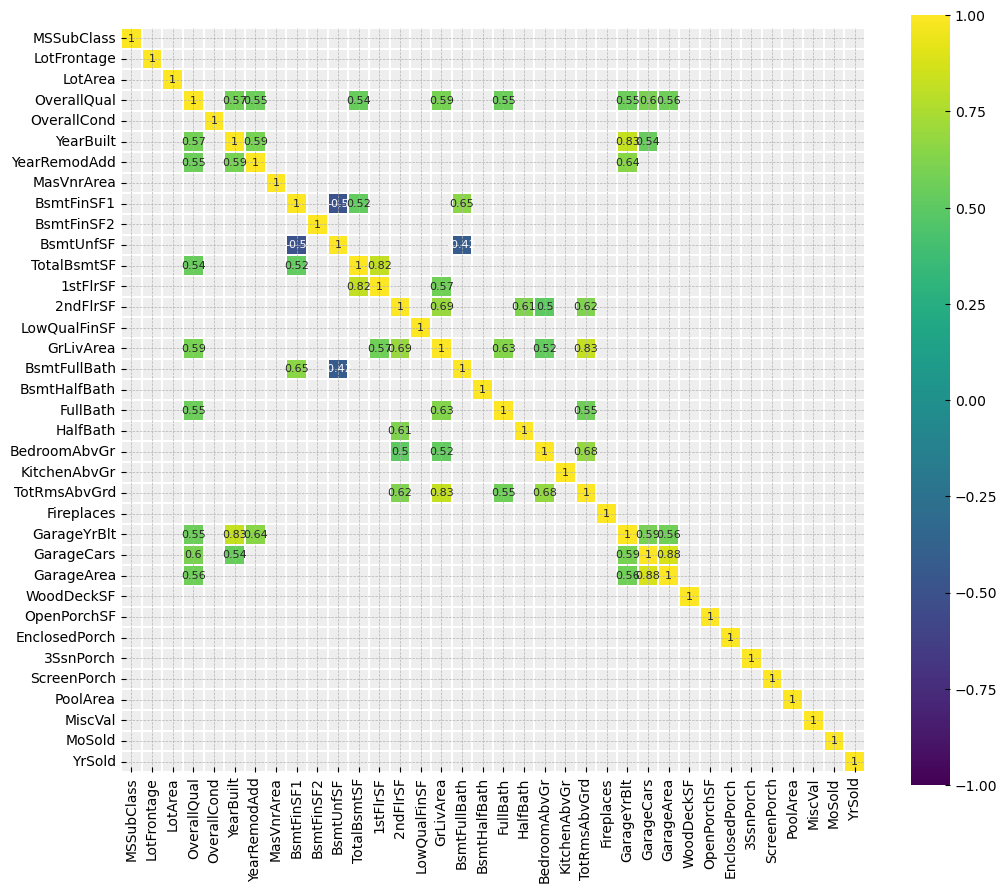

In [25]:
corr = num_feat.drop('SalePrice', axis=1).corr() 
plt.figure(figsize=(12, 10))

sb.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### observation

<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

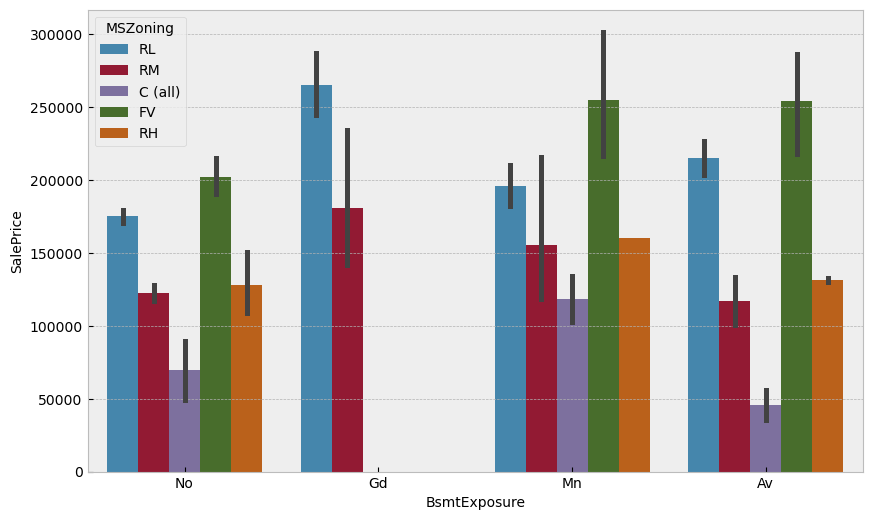

In [26]:
plt.figure(figsize=(10,6))
sb.barplot(x='BsmtExposure',y='SalePrice',hue='MSZoning',data = data2)

## SUPERVISED MACHINE LEARNING SECTION
### FEATURE ENGINEERING;

- Data cleaning
- Outlier detection and handling
- Feature encoding
- Feature normalization (scaling)
- Feature segmentation
- Cross validation (data splitting)

In [27]:
#Data processing
#data2.isna().sum()

In [29]:
#using the simple imputer to fill in all missing numerical data points
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
num_feat = pd.DataFrame(imputer.fit_transform(num_feat),columns=num_feat.columns)

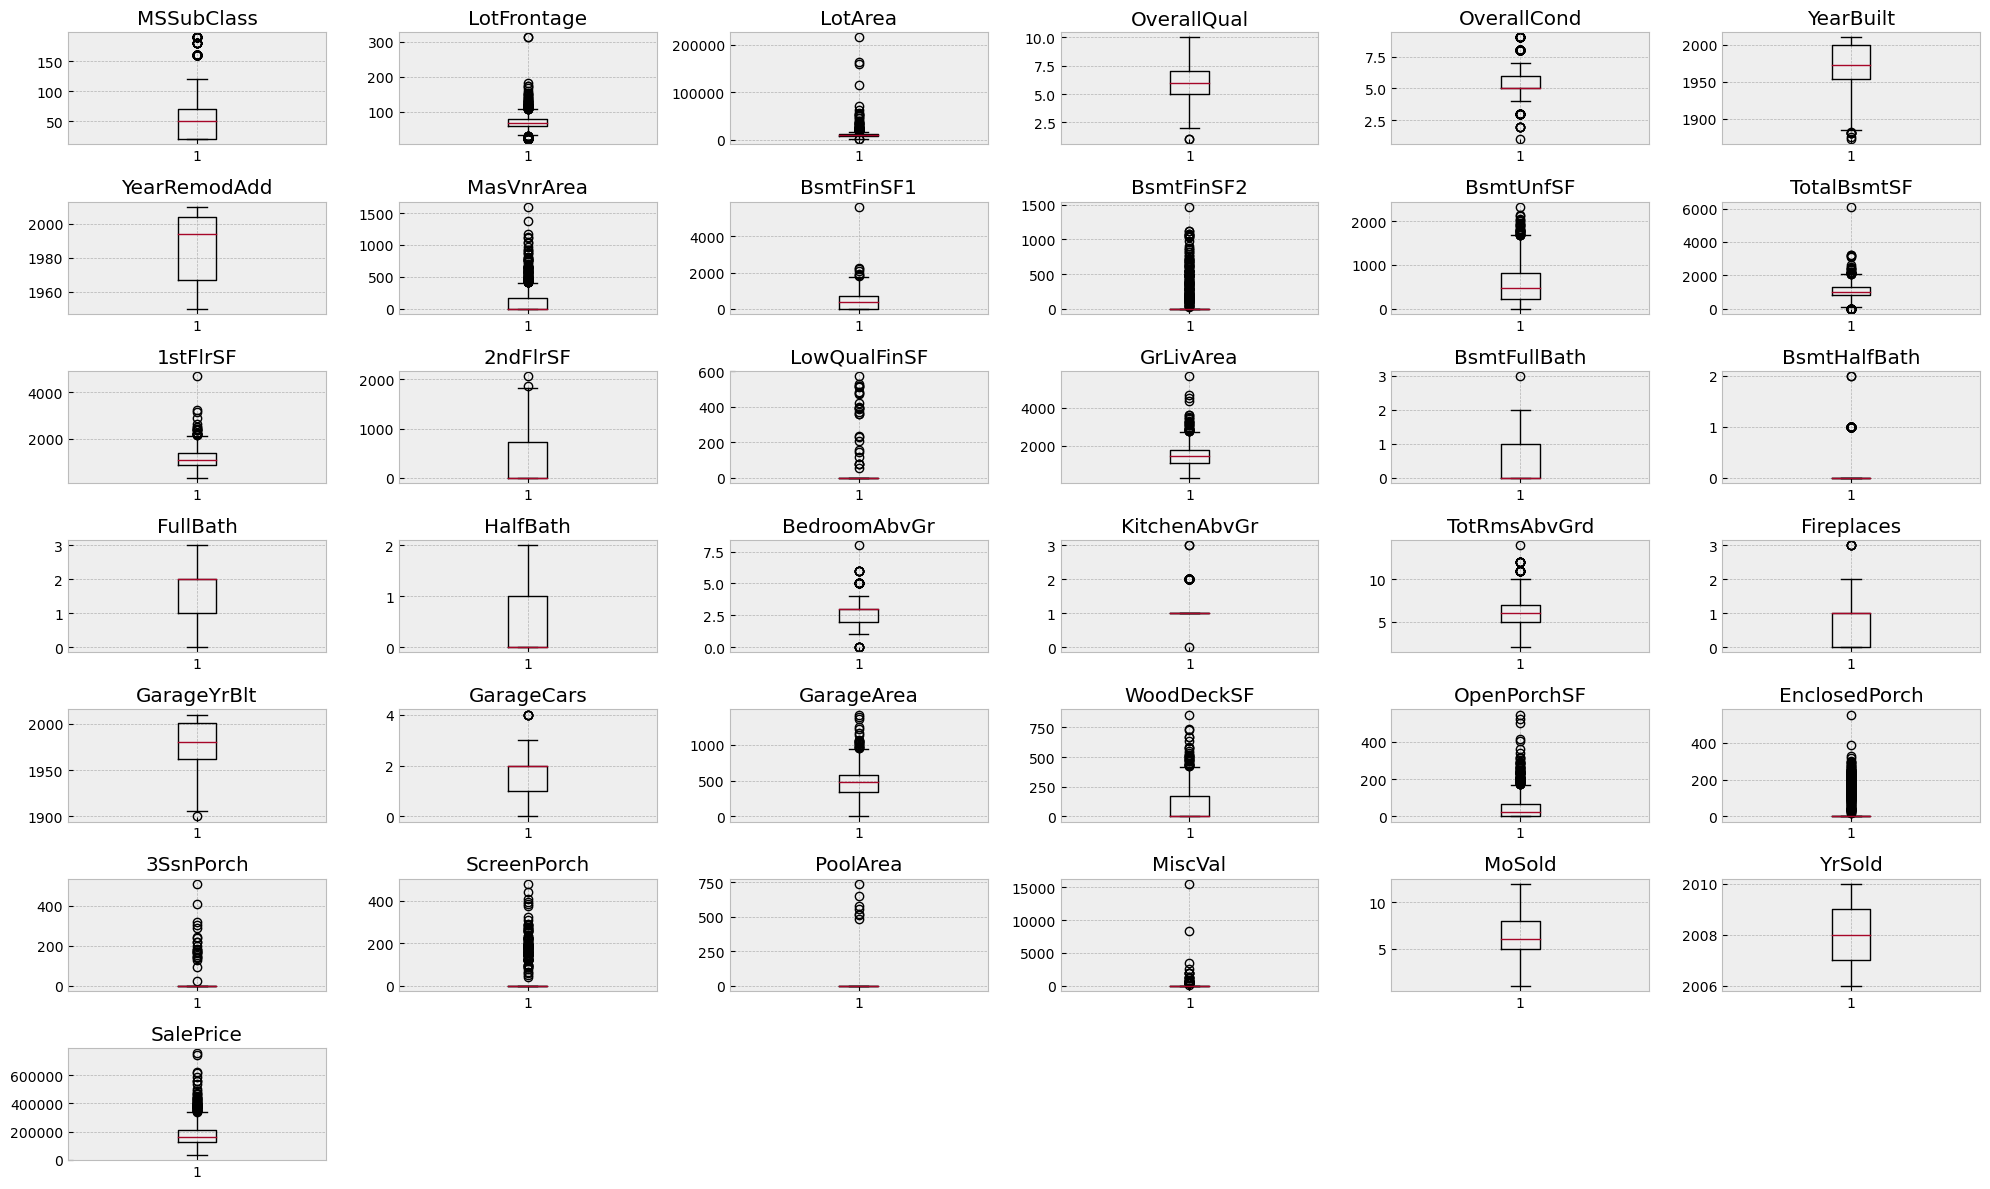

In [30]:
#outlier detection and plotting
plt.figure(figsize=(20,12))
for x,v in enumerate(num_feat):
 plt.subplot(7,6, x + 1)
 plt.boxplot(num_feat[v],whis=1.5)
 plt.tight_layout()
 plt.title(v)
plt.show();

In [31]:
#Merging cat feat and num feat into 1 data frame
new_data = pd.concat([cat_feat,num_feat],axis=1)
#new_data.head()

In [32]:
#segmenting data into features and target label
x = new_data.drop('SalePrice',axis=1)
target = new_data['SalePrice']

In [33]:
#encode categorical dataset
x = pd.get_dummies(x,drop_first=True,dtype='int64')
#x

In [34]:
#scale dataset using rubost scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
#x

Text(0.5, 1.0, ' Feature importance plot')

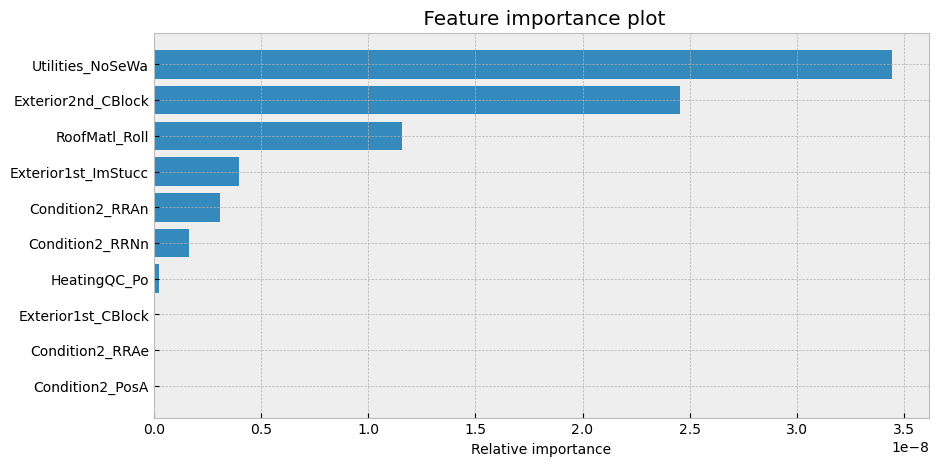

In [35]:
#checking for feature importance
from sklearn.ensemble import RandomForestRegressor

feat_im = RandomForestRegressor()
feat_im.fit(x,target)
feat_name = list(x.columns)
importances = feat_im.feature_importances_
indices = np.argsort(importances)[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(indices)),importances[indices],align='center')
plt.yticks(range(len(indices)),[feat_name[i] for i in indices])
plt.xlabel("Relative importance")
plt.title(" Feature importance plot")

In [36]:
#splitting data into training and evaluation dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,target,test_size=0.33,random_state=42)
X_test.shape

(482, 236)

### BUILDING A BASE MODEL

In [37]:
from sklearn.linear_model import LinearRegression #ols
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
#instantiate regressor models
lr_mod = LinearRegression()
r_mod = Ridge()
dc_tree = DecisionTreeRegressor()
gb_mod = GradientBoostingRegressor()

In [39]:
#fitting models on training data
lr_mod.fit(X_train,y_train)
r_mod.fit(X_train,y_train)
dc_tree.fit(X_train,y_train)
gb_mod.fit(X_train,y_train)

GradientBoostingRegressor()

In [40]:
ols_pred = lr_mod.predict(X_test)
r_pred = r_mod.predict(X_test)
dc_pred = dc_tree.predict(X_test)
gb_pred = gb_mod.predict(X_test)

### BASE MODEL EVALUATION

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

name = ['Linear Regression (ols)','Ridge Regression','Decision Tree Regressor','Gradient Boosting Regressor']

In [42]:
#for the ordinary least squares regression model
mae = mean_absolute_error(y_test,ols_pred)
mse = mean_squared_error(y_test,ols_pred)
rmse  = np.sqrt(mse)
score = r2_score(y_test,ols_pred)

print(f" The R Squared score of the {name[0]} is {score}\n")
print(f" The Mean Absolute Error of the {name[0]} is {mae}\n")
print(f" The Mean Squared Error of the {name[0]} is {mse}\n")
print(f" The Root Mean Squared Error of the {name[0]} is {rmse}\n")

 The R Squared score of the Linear Regression (ols) is 0.7700060127435431

 The Mean Absolute Error of the Linear Regression (ols) is 19143.96540217967

 The Mean Squared Error of the Linear Regression (ols) is 1688475871.03283

 The Root Mean Squared Error of the Linear Regression (ols) is 41091.0680201042



In [43]:
#for the Ridge Regression (linear model)
mse = mean_squared_error(y_test,r_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,r_pred)
r_score = r2_score(y_test,r_pred)

print(f" The R score for the {name[1]} is {r_score} \n")
print(f" The Mean Absolute score for the {name[1]} model is {mae} \n")
print(f" The Root Mean Squared Error Score for the {name[1]} model is {rmse} ")

 The R score for the Ridge Regression is 0.8480174498519624 

 The Mean Absolute score for the Ridge Regression model is 20455.42570772262 

 The Root Mean Squared Error Score for the Ridge Regression model is 33403.04448126932 


In [44]:
#for the Decision Regressor model (non_linear based model)
mse = mean_squared_error(y_test,dc_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,dc_pred)
r_score = r2_score(y_test,dc_pred)

print(f" The R score for the {name[2]} is {r_score} \n")
print(f" The Mean Absolute score for the {name[2]} model is {mae} \n")
print(f" The Root Mean Squared Error Score for the {name[2]} model is {rmse} ")

 The R score for the Decision Tree Regressor is 0.690044341464604 

 The Mean Absolute score for the Decision Tree Regressor model is 28524.22406639004 

 The Root Mean Squared Error Score for the Decision Tree Regressor model is 47702.26193524359 


In [45]:
#for the Boosting Regressor model (non_linear based model)
mse = mean_squared_error(y_test,gb_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,gb_pred)
r_score = r2_score(y_test,gb_pred)

print(f" The R score for the {name[3]} is {r_score} \n")
print(f" The Mean Absolute score for the {name[3]} is {mae} \n")
print(f" The Root Mean Squared Error Score for the {name[3]} is {rmse} ")

 The R score for the Gradient Boosting Regressor is 0.8621587544866235 

 The Mean Absolute score for the Gradient Boosting Regressor is 17391.789087538065 

 The Root Mean Squared Error Score for the Gradient Boosting Regressor is 31811.107005969552 


#### Observations
- we can identify the best performing model(gradient boost) having an r score of 0.86, which goes to show that in comparison to the other
  models, this model fits the data better
- looking at the absolute mean error and the root mean squard error, the loss error are much smaller when compared to the other models
  the avaerage loss of our predicted model will be 31217 dollars from the real sale price of a house

### RECOMMENDATIONS AND CONCLUSSION

- we trained this model with the data outliers, which might explain the poor performance of our models in the final predictions
  a good recommendatio will be to train without any outlier value and see wether that improves the predictions of our model
- more feature engineering should be done to improve the dataset
- a good recommendation for the linear based models will be to  check the Regression Assumptions 
- Hyper parameter tunning to improve the performance of the best model
- productionizing the best model to deploy
- this being just a base model, there is still lots of work to be done to reduce the loss increase the performance 